In [251]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os
import sys
from scipy.optimize import curve_fit, minimize
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple

def linear(x, a, b):
    return a*x + b


sys.path.append("../..")

from blume.process import read, compute, plot_file
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

# First Order

In [191]:
result = Results(varying_param="chi", range=[4, 6, 10, 14, 20, 32])
params = ModelParameters(model = "blume", var_range=(1.9, 2.1), step=0.0001, tol=1e-9, max_steps=int(10e9), use_prev=True, temperature=0.5)
result.get(params, sweeping_param="coupling")

chi=4: 100%|██████████| 2001/2001 [00:49<00:00, 40.24it/s]


Saving data in folder: '25-05 21:07'
Done 



chi=6: 100%|██████████| 2001/2001 [00:47<00:00, 42.42it/s]


Saving data in folder: '25-05 21:07'
Done 



chi=10: 100%|██████████| 2001/2001 [00:51<00:00, 38.87it/s]


Saving data in folder: '25-05 21:07'
Done 



chi=14: 100%|██████████| 2001/2001 [01:01<00:00, 32.43it/s]


Saving data in folder: '25-05 21:07'
Done 



chi=20: 100%|██████████| 2001/2001 [01:22<00:00, 24.24it/s]


Saving data in folder: '25-05 21:07'
Done 



chi=32: 100%|██████████| 2001/2001 [06:07<00:00,  5.45it/s]


Saving data in folder: '25-05 21:07'
Done 



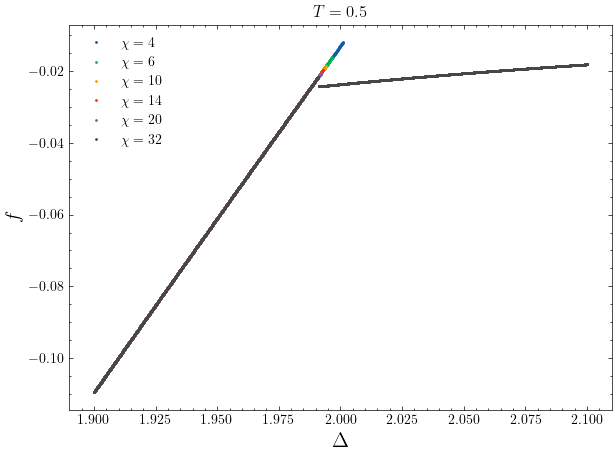

In [206]:
plt.figure(figsize = (7, 5))

for idx, chi in enumerate([4, 6, 10, 14, 20, 32]):    
    data = read("25-05 21:07", f"chi{chi}")
    energies = compute(Prop.f, data)
    couplings = data["couplings"]
    plt.plot(couplings, energies, "o", markersize = 1, label=f"$\chi = {chi}$")

plt.title("$T = 0.5$")
plt.xlabel("$\Delta$", fontsize = 15)
plt.ylabel("$f$", fontsize = 15)
plt.legend()

plt.show()

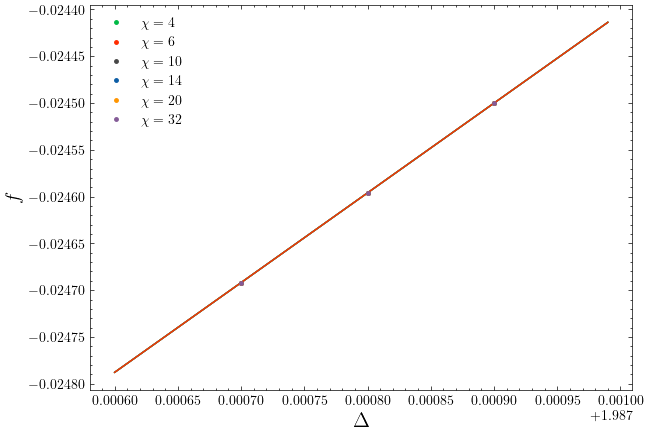

array([8.73162780e-06, 1.73567299e-05])

In [216]:
from scipy.optimize import curve_fit

def linear(x, a, b):
    return a*x + b

params_norm = []

plt.figure(figsize=(7, 5))
for idx, chi in enumerate([4, 6, 10, 14, 20, 32]):    
    data = read("25-05 21:07", f"chi{chi}")
    energies = compute(Prop.f, data)[877:880]
    couplings = data["couplings"][877:880]
    result = curve_fit(linear, couplings, energies)
    params_norm.append((result[0][0], result[0][1]))
    x = [x for x in np.arange(1.9876, 1.988, 0.00001)]
    y = [linear(val, result[0][0], result[0][1]) for val in x] 
    plt.plot(x, y)
    plt.plot(couplings, energies, "o", markersize = 2.5, label=f"$\chi = {chi}$")
    
errors = np.sqrt(np.diag(result[1]))

plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel("$f$", fontsize = 15)
plt.legend()
plt.show()

errors


In [203]:
couplings = [coupling for coupling in np.arange(1.9, 2.1, 0.0001)]
couplings.reverse()

result = Results(varying_param="chi", range=[4, 6, 10, 14, 20, 32])
params = ModelParameters(model = "blume", var_range=couplings, tol=1e-9, max_steps=int(10e9), use_prev=True, temperature=0.5)
result.get(params, sweeping_param="coupling")

chi=4: 100%|██████████| 2001/2001 [00:44<00:00, 44.83it/s]


Saving data in folder: '25-05 21:28'
Done 



chi=6: 100%|██████████| 2001/2001 [00:45<00:00, 44.40it/s]


Saving data in folder: '25-05 21:28'
Done 



chi=10: 100%|██████████| 2001/2001 [00:49<00:00, 40.27it/s]


Saving data in folder: '25-05 21:28'
Done 



chi=14: 100%|██████████| 2001/2001 [01:01<00:00, 32.61it/s]


Saving data in folder: '25-05 21:28'
Done 



chi=20: 100%|██████████| 2001/2001 [01:21<00:00, 24.68it/s]


Saving data in folder: '25-05 21:28'
Done 



chi=32: 100%|██████████| 2001/2001 [06:03<00:00,  5.50it/s]


Saving data in folder: '25-05 21:28'
Done 



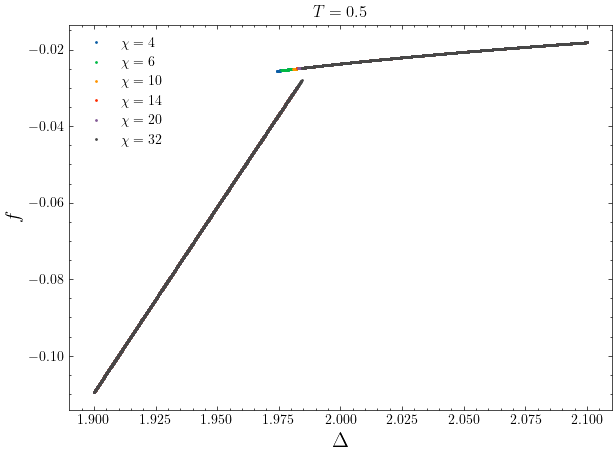

In [217]:
plt.figure(figsize = (7, 5))

for idx, chi in enumerate([4, 6, 10, 14, 20, 32]):    
    data = read("25-05 21:28", f"chi{chi}")
    energies = compute(Prop.f, data)
    couplings = data["couplings"]
    plt.plot(couplings, energies, "o", markersize = 1, label=f"$\chi = {chi}$")

plt.title("$T = 0.5$")
plt.xlabel("$\Delta$", fontsize = 15)
plt.ylabel("$f$", fontsize = 15)
plt.legend()

plt.show()

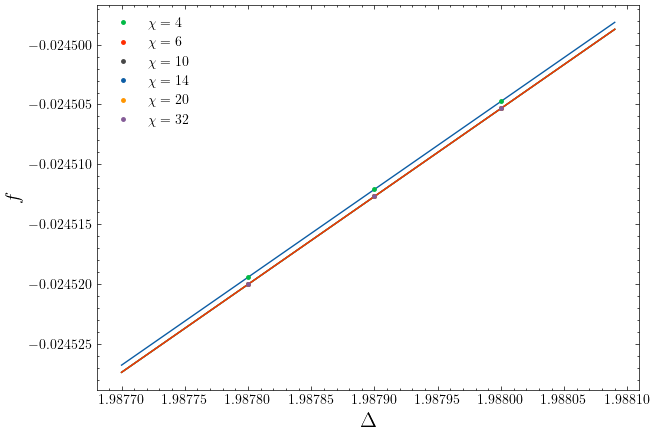

array([1.33390014e-05, 2.65166010e-05])

In [221]:
params_inv = []

plt.figure(figsize=(7, 5))
for idx, chi in enumerate([4, 6, 10, 14, 20, 32]):    
    data = read("25-05 21:28", f"chi{chi}")
    energies = compute(Prop.f, data)[1120:1123]
    couplings = data["couplings"][1120:1123]
    result = curve_fit(linear, couplings, energies)
    params_inv.append((result[0][0], result[0][1]))
    x = [x for x in np.arange(1.9877, 1.9881, 0.00001)]
    y = [linear(val, result[0][0], result[0][1]) for val in x] 
    plt.plot(x, y)
    plt.plot(couplings, energies, "o", markersize = 2.5, label=f"$\chi = {chi}$")
    
errors_inv = np.sqrt(np.diag(result[1]))

plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel("$f$", fontsize = 15)
plt.legend()
plt.show()

errors_inv


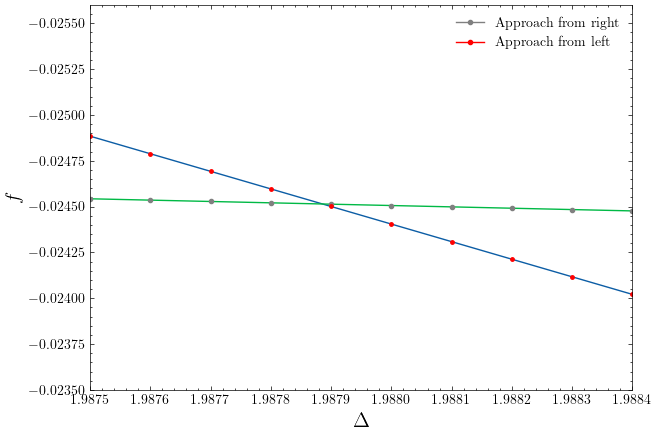

In [222]:
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D


plt.figure(figsize=(7, 5))
crits = []


params = list(zip(params_norm, params_inv))

    
x = [x for x in np.arange(1.98, 2.01, 0.00001)]
y = [linear(val, params[-1][0][0], params[-1][0][1]) for val in x] 
plt.plot(x, y)
x = [x for x in np.arange(1.98, 2.01, 0.00001)]
y = [linear(val, params[-1][1][0], params[-1][1][1]) for val in x] 
plt.plot(x, y)
    

res = minimize(lambda t: (linear(t, params[-1][0][0], params[-1][0][1]) - linear(t,params[-1][1][0], params[-1][1][1]))**2, 1, tol = 1e-6)
crits.append(res.x)



data = read("25-05 21:28", f"chi32")
energies = compute(Prop.f, data)[1110:1130]
couplings = data["couplings"][1110:1130]
plt.plot(couplings, energies, "o", markersize = 3, color = "gray")

data = read("25-05 21:07", f"chi32")
energies = compute(Prop.f, data)[870:890]
couplings = data["couplings"][870:890]
plt.plot(couplings, energies, "o", markersize = 2.5, label=f"$\chi32$", color = "r")


plt.xlim(1.9875, 1.9884)
plt.ylim(-0.0235, -0.0256)
plt.ylabel("$f$", fontsize=15)
plt.xlabel("$\Delta$", fontsize=15)

custom_lines = [Line2D([0], [0], color="gray", lw=1, linestyle="-", marker="o", markersize=3),
                Line2D([0], [0], color="red", lw=1, linestyle="-", marker="o", markersize=3)]



plt.legend(custom_lines, ["Approach from right", "Approach from left"])
plt.show()

In [223]:

a, b = params[-1][0][0], params[-1][0][1]
a_inv, b_inv = params[-1][1][0], params[-1][1][1]
a_err_inv, b_err_inv = errors_inv[0], errors_inv[1]
a_err, b_err = errors[0], errors[1]
delta = crits[-1][0]

delta_error = delta * np.sqrt(((b_err**2 + b_err_inv**2) / (b - b_inv)**2) + ((a_err**2 + a_err_inv**2) / (a - a_inv)**2))
delta_error

5.0605394730056625e-05

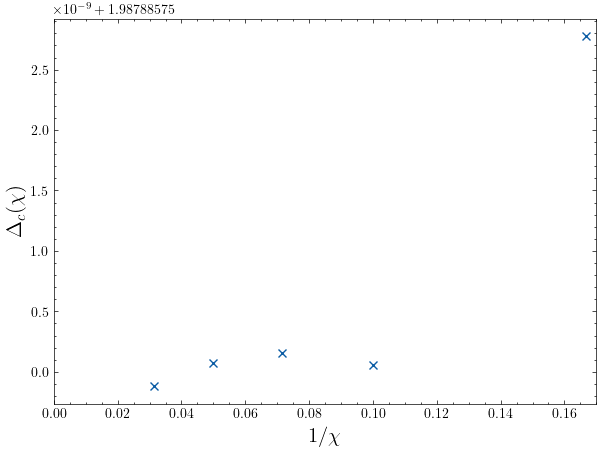

In [217]:
chis = [4, 6, 10, 14, 20, 32]
inv_chis = [1/chi for chi in chis]
plt.figure(figsize=(7, 5))
plt.plot(inv_chis[1:], crits[1:], "x")
plt.xlabel("$1/ \chi$", fontsize = 15)
plt.ylabel("$\Delta_c(\chi)$", fontsize= 15)
plt.xlim(0, 0.17)
plt.show()

In [225]:
print(f"delta_c = {round(float(crits[-1]), 5)}(5)")

delta_c = 1.98789(5)


In [233]:
result = Results()
params = ModelParameters(model = "blume", var_range=(1.9, 2.1), step=0.00001, tol=1e-9, max_steps=int(10e9), use_prev=True, temperature=0.5, chi=16)
result.get(params, sweeping_param="coupling")

100%|██████████| 20001/20001 [10:02<00:00, 33.22it/s] 


Saving data in folder: '25-05 22:15'
Done 



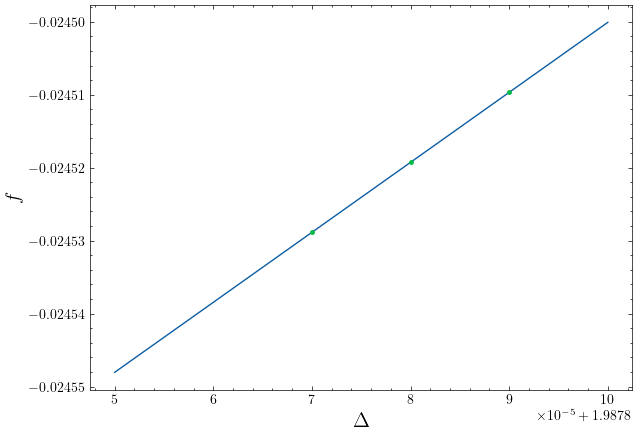

array([8.75178789e-07, 1.73975042e-06])

In [9]:
plt.figure(figsize=(7, 5))

data = read("25-05 22:15", "data")
energies = compute(Prop.f, data)[8787:8790]
couplings = data["couplings"][8787:8790]
result_norm = curve_fit(linear, couplings, energies)
x = [x for x in np.arange(1.98785, 1.9879, 0.00001)]
y = [linear(val, result_norm[0][0], result_norm[0][1]) for val in x] 
plt.plot(x, y)
plt.plot(couplings, energies, "o", markersize = 2.5)
    

plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel("$f$", fontsize = 15)
plt.show()

errors = np.sqrt(np.diag(result_norm[1]))
errors

In [234]:
couplings = [coupling for coupling in np.arange(1.9, 2.1, 0.00001)]
couplings.reverse()

result = Results()
params = ModelParameters(model = "blume", var_range=couplings, tol=1e-9, max_steps=int(10e9), use_prev=True, temperature=0.5, chi=20)
result.get(params, sweeping_param="coupling")

100%|██████████| 20001/20001 [12:12<00:00, 27.32it/s]


Saving data in folder: '25-05 22:29'
Done 



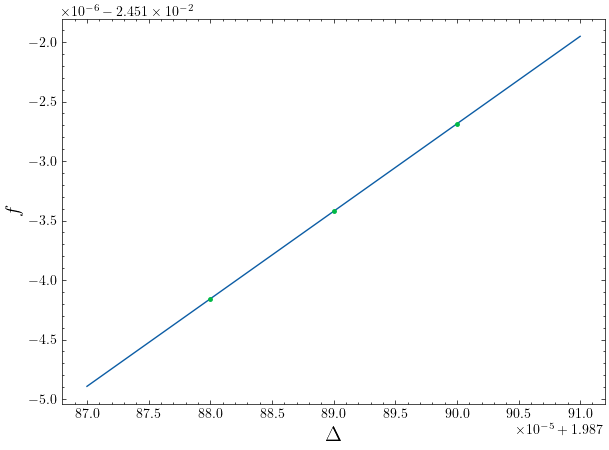

[1.33528655e-06 2.65440278e-06]


In [7]:
plt.figure(figsize=(7, 5))

data = read("25-05 22:29", "data")
energies = compute(Prop.f, data)[11210:11213]
couplings = data["couplings"][11210:11213]
result_inv = curve_fit(linear, couplings, energies)
x = [x for x in np.arange(1.98787, 1.98791, 0.00001)]
y = [linear(val, result_inv[0][0], result_inv[0][1]) for val in x]
plt.plot(x, y)
plt.plot(couplings, energies, "o", markersize=2.5)


plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel("$f$", fontsize=15)

errors_inv = np.sqrt(np.diag(result_inv[1]))
plt.show()

print(errors_inv)

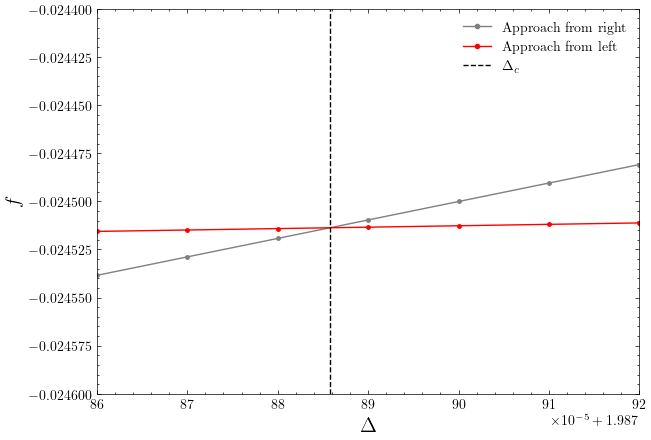

In [14]:
plt.figure(figsize=(7, 5))  
x = [x for x in np.arange(1.98, 1.99, 0.00001)]
y = [linear(val, result_norm[0][0], result_norm[0][1]) for val in x] 
plt.plot(x, y, color = "gray")
x = [x for x in np.arange(1.98, 1.99, 0.00001)]
y = [linear(val, result_inv[0][0], result_inv[0][1]) for val in x] 
plt.plot(x, y, color = "red")

data = read("25-05 22:29", "data")
energies = compute(Prop.f, data)
couplings = data["couplings"]
plt.plot(couplings, energies, "o", markersize=2.5, color="red")

data = read("25-05 22:15", "data")
energies = compute(Prop.f, data)
couplings = data["couplings"]
plt.plot(couplings, energies, "o", markersize=2.5, color="gray")
plt.xlim(1.98786, 1.98792)
plt.ylim(-0.0246, -0.0244)
    



res = minimize(lambda t: (linear(t, result_norm[0][0], result_norm[0][1]) - linear(t, result_inv[0][0], result_inv[0][1]))**2, 1, tol = 1e-9)
plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel("$f$", fontsize=15)


custom_lines = [Line2D([0], [0], color="gray", lw=1, linestyle="-", marker="o", markersize=3),
                Line2D([0], [0], color="red", lw=1, linestyle="-", marker="o", markersize=3),
                Line2D([0], [0], color="k", lw=1, linestyle="--"),
]

plt.axvline(x= res.x, linestyle="--", label="\Delta_c", color="k")
plt.legend(custom_lines, ["Approach from right", "Approach from left", "$\Delta_c$"])

plt.show()

In [15]:
a, b = result_norm[0][0], result_norm[0][1]
a_inv, b_inv = result_inv[0][0], result_inv[0][1]
a_err_inv, b_err_inv = errors_inv[0], errors_inv[1]
a_err, b_err = errors[0], errors[1]
delta = res.x

delta_error = delta * np.sqrt(((b_err**2 + b_err_inv**2) / (b - b_inv)**2) + ((a_err**2 + a_err_inv**2) / (a - a_inv)**2))
delta_error[0]

5.067913657286984e-06

In [20]:
print(f"{round(res.x[0], 6)}(5)")

1.987886(5)


In [207]:
result = Results()
params = ModelParameters(model = "blume", var_range=[1.987885765 - 5e-3, 1.987885765 - 0.5e-8, 1.987885765,  1.987885765 + 0.5e-8,], step=0.00001, tol=1e-11, max_steps=int(10e9), use_prev=True, temperature=0.5, chi=16)
result.get(params, sweeping_param="coupling")

100%|██████████| 4/4 [00:00<00:00, 10.59it/s]

Saving data in folder: '09-06 12:01'
Done 



In [208]:
result = Results()
params = ModelParameters(model = "blume", var_range=[1.987885765 + 5e-3,  1.987885765 + 0.5e-8, 1.987885765, 1.987885765- 0.5e-8], tol=1e-11, max_steps=int(10e9), use_prev=True, temperature=0.5, chi=16)
result.get(params, sweeping_param="coupling")

100%|██████████| 4/4 [00:00<00:00, 15.96it/s]

Saving data in folder: '09-06 12:01(1)'
Done 



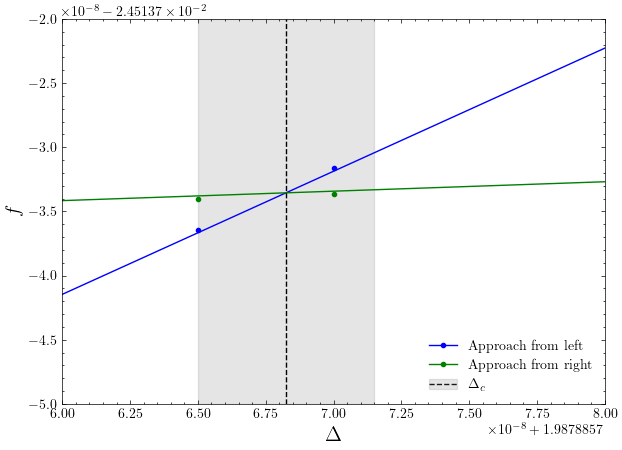

In [254]:
data = read('09-06 12:01', "data")
data_inv = read("09-06 12:01(1)", "data")
couplings, couplings_inv = data["couplings"][2:], data_inv["couplings"][1:-1]
energies, energies_inv = compute(Prop.f, data)[2:], compute(Prop.f, data_inv)[1:-1]

fig,ax = plt.subplots(figsize= (7, 5))

x1, x2, y1, y2 = couplings[0], couplings[1], energies[0], energies[1]
a = (y1-y2)/(x1-x2)
b = (x1*y2 - x2*y1)/(x1-x2)
x = [x for x in np.arange(1.98785, 1.9879, 0.00001)]
y = [linear(val, a, b) for val in x] 
p1, = ax.plot(x, y, color = "b")

x1, x2, y1, y2 = couplings_inv[0], couplings_inv[1], energies_inv[0], energies_inv[1]
a_inv = (y1-y2)/(x1-x2)
b_inv = (x1*y2 - x2*y1)/(x1-x2)
x = [x for x in np.arange(1.98785, 1.9879, 0.00001)]
y = [linear(val, a_inv, b_inv) for val in x] 
p2, = ax.plot(x, y, color = "g")


p3, = ax.plot(couplings, energies, "o", markersize=3, color = "b")
p4, = ax.plot(couplings_inv, energies_inv, "o", markersize=3, color = "g" )
ax.set_xlim(1.9878857 + 6e-8, 1.9878857 + 8e-8)
ax.set_ylim(-0.024513748, -0.02451372)
ax.set_xlabel("$\Delta$", fontsize=15)
ax.set_ylabel("$f$", fontsize=15)


custom_lines = [Line2D([0], [0], color="b", lw=1, linestyle="-", marker="o", markersize=3),
                Line2D([0], [0], color="g", lw=1, linestyle="-", marker="o", markersize=3),
                Line2D([0], [0], color="k", lw=1, linestyle="--"),
]

res = minimize(lambda t: (linear(t, a, b) - linear(t, a_inv, b_inv))**2, 1, tol = 1e-11, method="Powell")
p5 = ax.axvline(x= res.x, linestyle="--", label="\Delta_c", color="k")
p6 = ax.axvspan(couplings[0], 2*res.x[0] - couplings[0], color="gray", alpha=0.2)


ax.legend([(p1, p3), (p2, p4), (p5, p6)], ['Approach from left', "Approach from right", "$\Delta_c$"], handler_map={tuple: HandlerTuple(ndivide=1)})

plt.show()

In [243]:
res.x[0]
error = res.x[0] - couplings[0]
error

3.2447551312486667e-09

In [250]:
print(f"{round(res.x[0], 9)}(3)")

1.987885768(3)


# Second Order

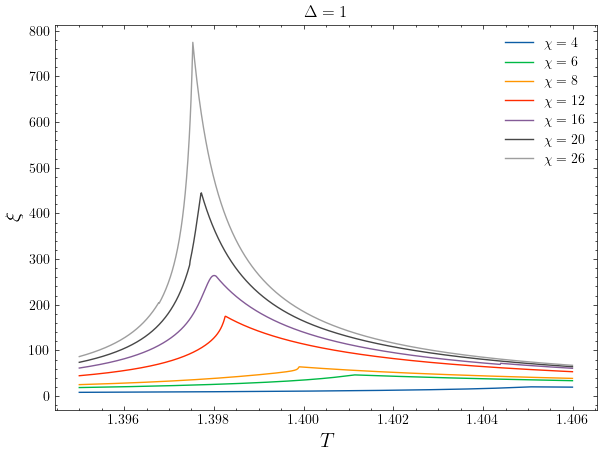

In [8]:
T_stars = []
corrs = []
plt.figure(figsize=(7, 5))

for chi in [4, 6]:
    data = read("26-05 14:20", f"chi{chi}")
    xis = compute(Prop.xi, data)
    plt.plot(data["temperatures"], xis, label = f"$\chi = {chi}$")
    corrs.append(max(xis))
    T_stars.append(data["temperatures"][xis.index(max(xis))])


data = read("26-05 16:15", f"chi8")
xis = compute(Prop.xi, data)
corrs.append(max(xis))
T_stars.append(data["temperatures"][xis.index(max(xis))])
plt.plot(data["temperatures"], xis, label = "$\chi = 8$")

data = read("26-05 21:50", f"chi12")
xis = compute(Prop.xi, data)
corrs.append(max(xis))
T_stars.append(data["temperatures"][xis.index(max(xis))])
plt.plot(data["temperatures"], xis, label = "$\chi = 12$")

for chi in [16, 20]:
    data = read("27-05 01:01", f"chi{chi}")
    xis = compute(Prop.xi, data)
    corrs.append(max(xis))
    plt.plot(data["temperatures"], xis, label = f"$\chi = {chi}$")
    T_stars.append(data["temperatures"][xis.index(max(xis))])

data = read("27-05 11:52", f"chi26")
xis = compute(Prop.xi, data)
corrs.append(max(xis))
T_stars.append(data["temperatures"][xis.index(max(xis))])
plt.plot(data["temperatures"], xis, label = f"$\chi = 26$")

plt.xlabel(r"$T$", fontsize = 15)
plt.ylabel(r"$\xi$", fontsize = 15)
plt.title(r"$\Delta = 1$")
plt.legend()
plt.show()

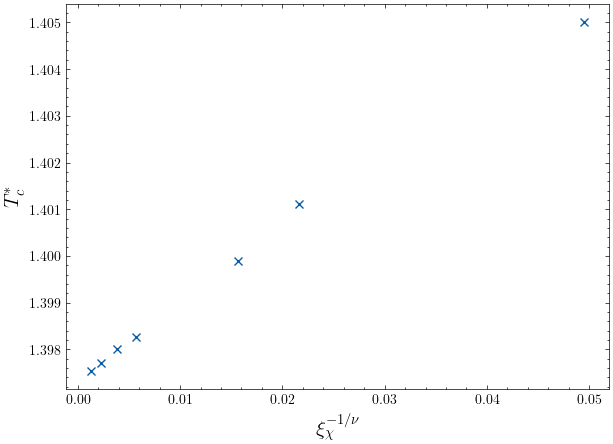

In [9]:
plt.figure(figsize= (7,5))
corrs_inv = [1/corr for corr in corrs]
plt.errorbar(corrs_inv, T_stars, fmt="x", yerr = 0.00001)
plt.xlabel(r"$\xi_{\chi}^{-1/\nu}$", fontsize=15)
plt.ylabel("$T^*_c$", fontsize=15)
plt.show()

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 6
    # variables        = 2
    chi-square         = 2.2603e-08
    reduced chi-square = 5.6508e-09
    Akaike info crit   = -112.381570
    Bayesian info crit = -112.798051
    R-squared          = 0.99780041
[[Variables]]
    a:  0.17297134 +/- 0.00406063 (2.35%) (init = 0.5)
    b:  1.39730792 +/- 4.5810e-05 (0.00%) (init = 1.38)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.7424


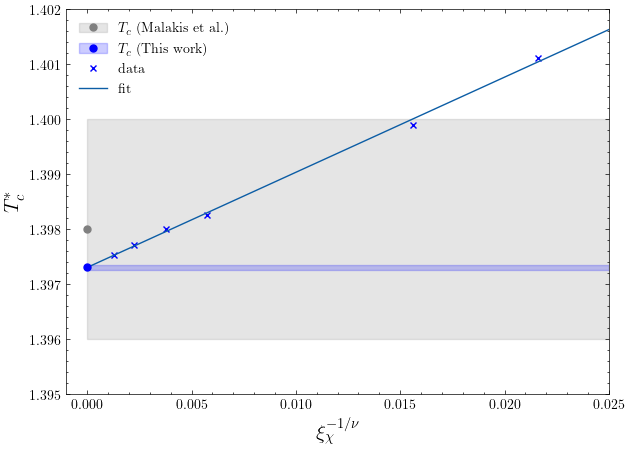

In [152]:
from matplotlib.legend_handler import HandlerTuple

model = Model(lambda x, a, b: a*x+b)

fig,ax = plt.subplots(figsize= (7, 5))

p1 = ax.axhspan(1.396, 1.4, color="gray", alpha=0.2, xmin= 0.038)
p2, = ax.plot(0, 1.398, "o", color="gray", markersize=5)

p5, = ax.plot(corrs_inv[1:], T_stars[1:], 'x', color="b", markersize = 4)


x, y = corrs_inv[1:], T_stars[1:]

params = model.make_params(a=0.5, b=1.38)
result = model.fit(y, params, x=x)

print(result.fit_report())

fit_x = [fit_x for fit_x in np.arange(0, 0.05, 0.0001)]
fit_y = [result.params["a"]*x + result.params["b"] for x in fit_x]

p6, = ax.plot(fit_x, fit_y, '-', label='best fit')
plt.xlabel(r"$\xi_{\chi}^{-1/\nu}$", fontsize=15)
plt.ylabel("$T^*_c$", fontsize=15)
plt.legend()
plt.xlim(-0.001, 0.025)
plt.ylim(1.395, 1.402)
p3,= ax.plot(0, result.params["b"].value, "o", color="b", markersize=5)
p4 = ax.axhspan(result.params["b"].value - result.params["b"].stderr , result.params["b"].value + result.params["b"].stderr, color="b", alpha=0.2, xmin= 0.035)

ax.legend([(p1, p2), (p3, p4), (p5), (p6)], ['$T_c$ (Malakis et al.)', "$T_c$ (This work)", "data", "fit"], handler_map={tuple: HandlerTuple(ndivide=1)})
    
plt.show()

In [56]:
print(result.params["b"].stderr)
result.params["b"].value

4.58095742595477e-05


1.3973079176270817

In [61]:
print(f"{round(result.params['b'].value, 5)}(5)")

1.39731(5)
